In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
# Convert price_range into a binary target variable
df["price_binary"] = (df["price_range"] >= 2).astype(int)
df = df.drop(columns=["price_range"])
X = df.drop(columns=["price_binary"])
y = df["price_binary"]



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to DataFrame for modeling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)



In [2]:
with pm.Model() as logistic_model:
    # Priors for coefficients and intercept
    betas = pm.Normal("betas", mu=0, sigma=1, shape=X_scaled_df.shape[1])
    intercept = pm.Normal("intercept", mu=0, sigma=1)
    
    # Logit transformation
    logits = intercept + pm.math.dot(X_scaled_df.values, betas)
    
    # Likelihood (Bernoulli)
    y_obs = pm.Bernoulli("y_obs", logit_p=logits, observed=y.values)
    
    #sampling
    trace = pm.sample(2000, tune=1000, return_inferencedata=True, target_accept=0.9)

# Display MCMC diagnostics
az.summary(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, intercept]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 155 seconds.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0]    2.555  0.186   2.219    2.921      0.002    0.002    7508.0   
betas[1]    0.015  0.131  -0.230    0.263      0.001    0.001   10667.0   
betas[2]   -0.028  0.130  -0.276    0.217      0.001    0.002   11380.0   
betas[3]   -0.108  0.132  -0.359    0.137      0.001    0.002   10256.0   
betas[4]    0.028  0.170  -0.301    0.346      0.002    0.002    8815.0   
betas[5]   -0.110  0.155  -0.388    0.187      0.002    0.002    8796.0   
betas[6]    0.117  0.134  -0.137    0.369      0.001    0.002   11126.0   
betas[7]   -0.188  0.129  -0.433    0.060      0.001    0.001   10369.0   
betas[8]   -0.286  0.130  -0.528   -0.045      0.001    0.002   10237.0   
betas[9]    0.173  0.127  -0.066    0.413      0.001    0.001   11665.0   
betas[10]   0.107  0.171  -0.200    0.446      0.002    0.002    8661.0   
betas[11]   1.389  0.174   1.047    1.707      0.002    0.002    9321.0   
betas[12]   1.529  0.179   1.178    1.854      0.002    0.002    8722.0   
betas[13]  10.039  0.552   8.995   11.070      0.007    0.006    7013.0   
betas[14]  -0.037  0.147  -0.315    0.240      0.002    0.002    9336.0   
betas[15]   0.087  0.154  -0.195    0.375      0.002    0.002    9304.0   
betas[16]   0.039  0.132  -0.197    0.298      0.001    0.002   11338.0   
betas[17]   0.110  0.160  -0.176    0.421      0.002    0.002    9342.0   
betas[18]  -0.134  0.130  -0.369    0.118      0.001    0.002   10601.0   
betas[19]  -0.166  0.131  -0.424    0.070      0.001    0.001   10568.0   
intercept   0.042  0.128  -0.196    0.280      0.001    0.001   10056.0   

           ess_tail  r_hat  
betas[0]     6157.0    1.0  
betas[1]     5750.0    1.0  
betas[2]     5955.0    1.0  
betas[3]     5849.0    1.0  
betas[4]     6118.0    1.0  
betas[5]     6437.0    1.0  
betas[6]     6040.0    1.0  
betas[7]     6190.0    1.0  
betas[8]     5876.0    1.0  
betas[9]     6306.0    1.0  
betas[10]    6089.0    1.0  
betas[11]    6295.0    1.0  
betas[12]    6384.0    1.0  
betas[13]    5612.0    1.0  
betas[14]    6215.0    1.0  
betas[15]    5873.0    1.0  
betas[16]    6011.0    1.0  
betas[17]    6307.0    1.0  
betas[18]    5577.0    1.0  
betas[19]    6042.0    1.0  
intercept    6385.0    1.0

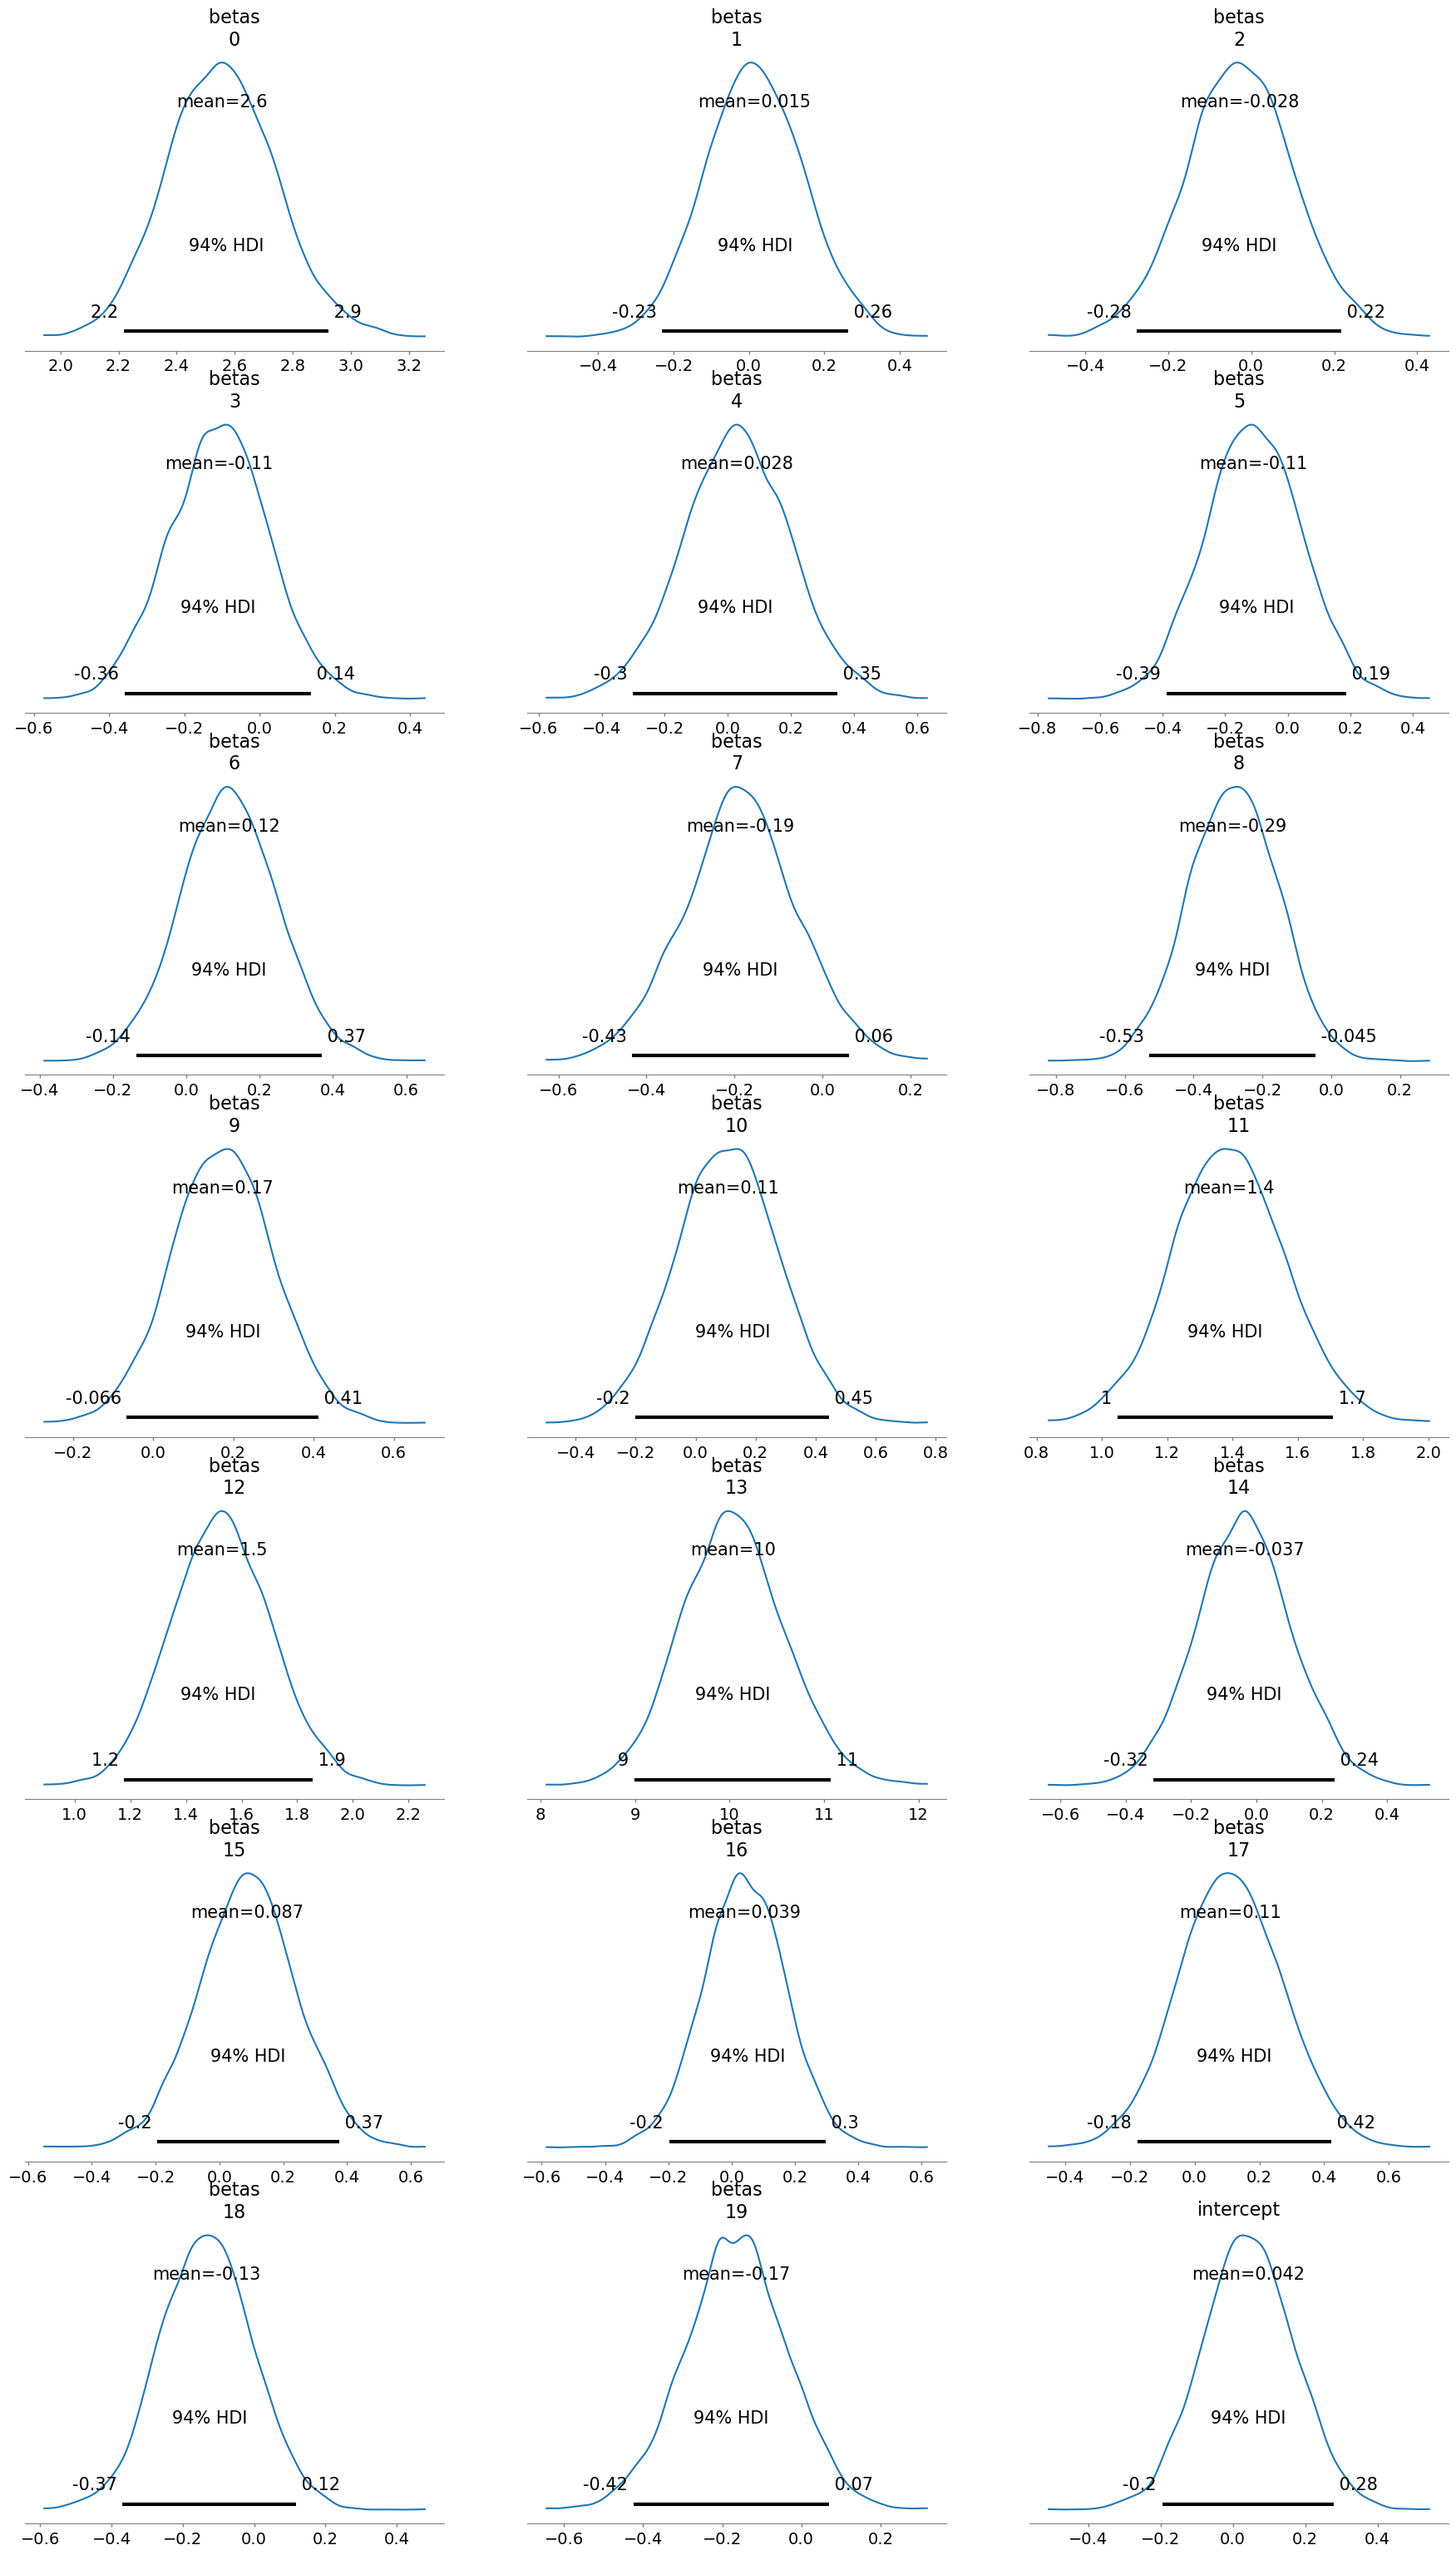

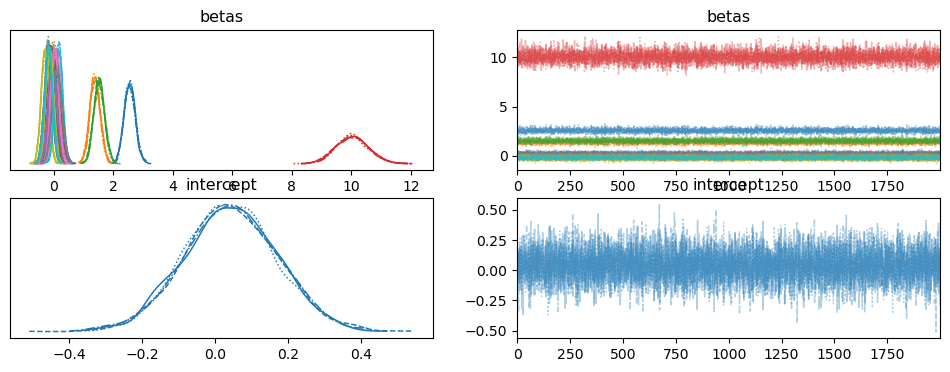

/opt/conda/lib/python3.11/site-packages/arviz/plots/backends/matplotlib/pairplot.py:233: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


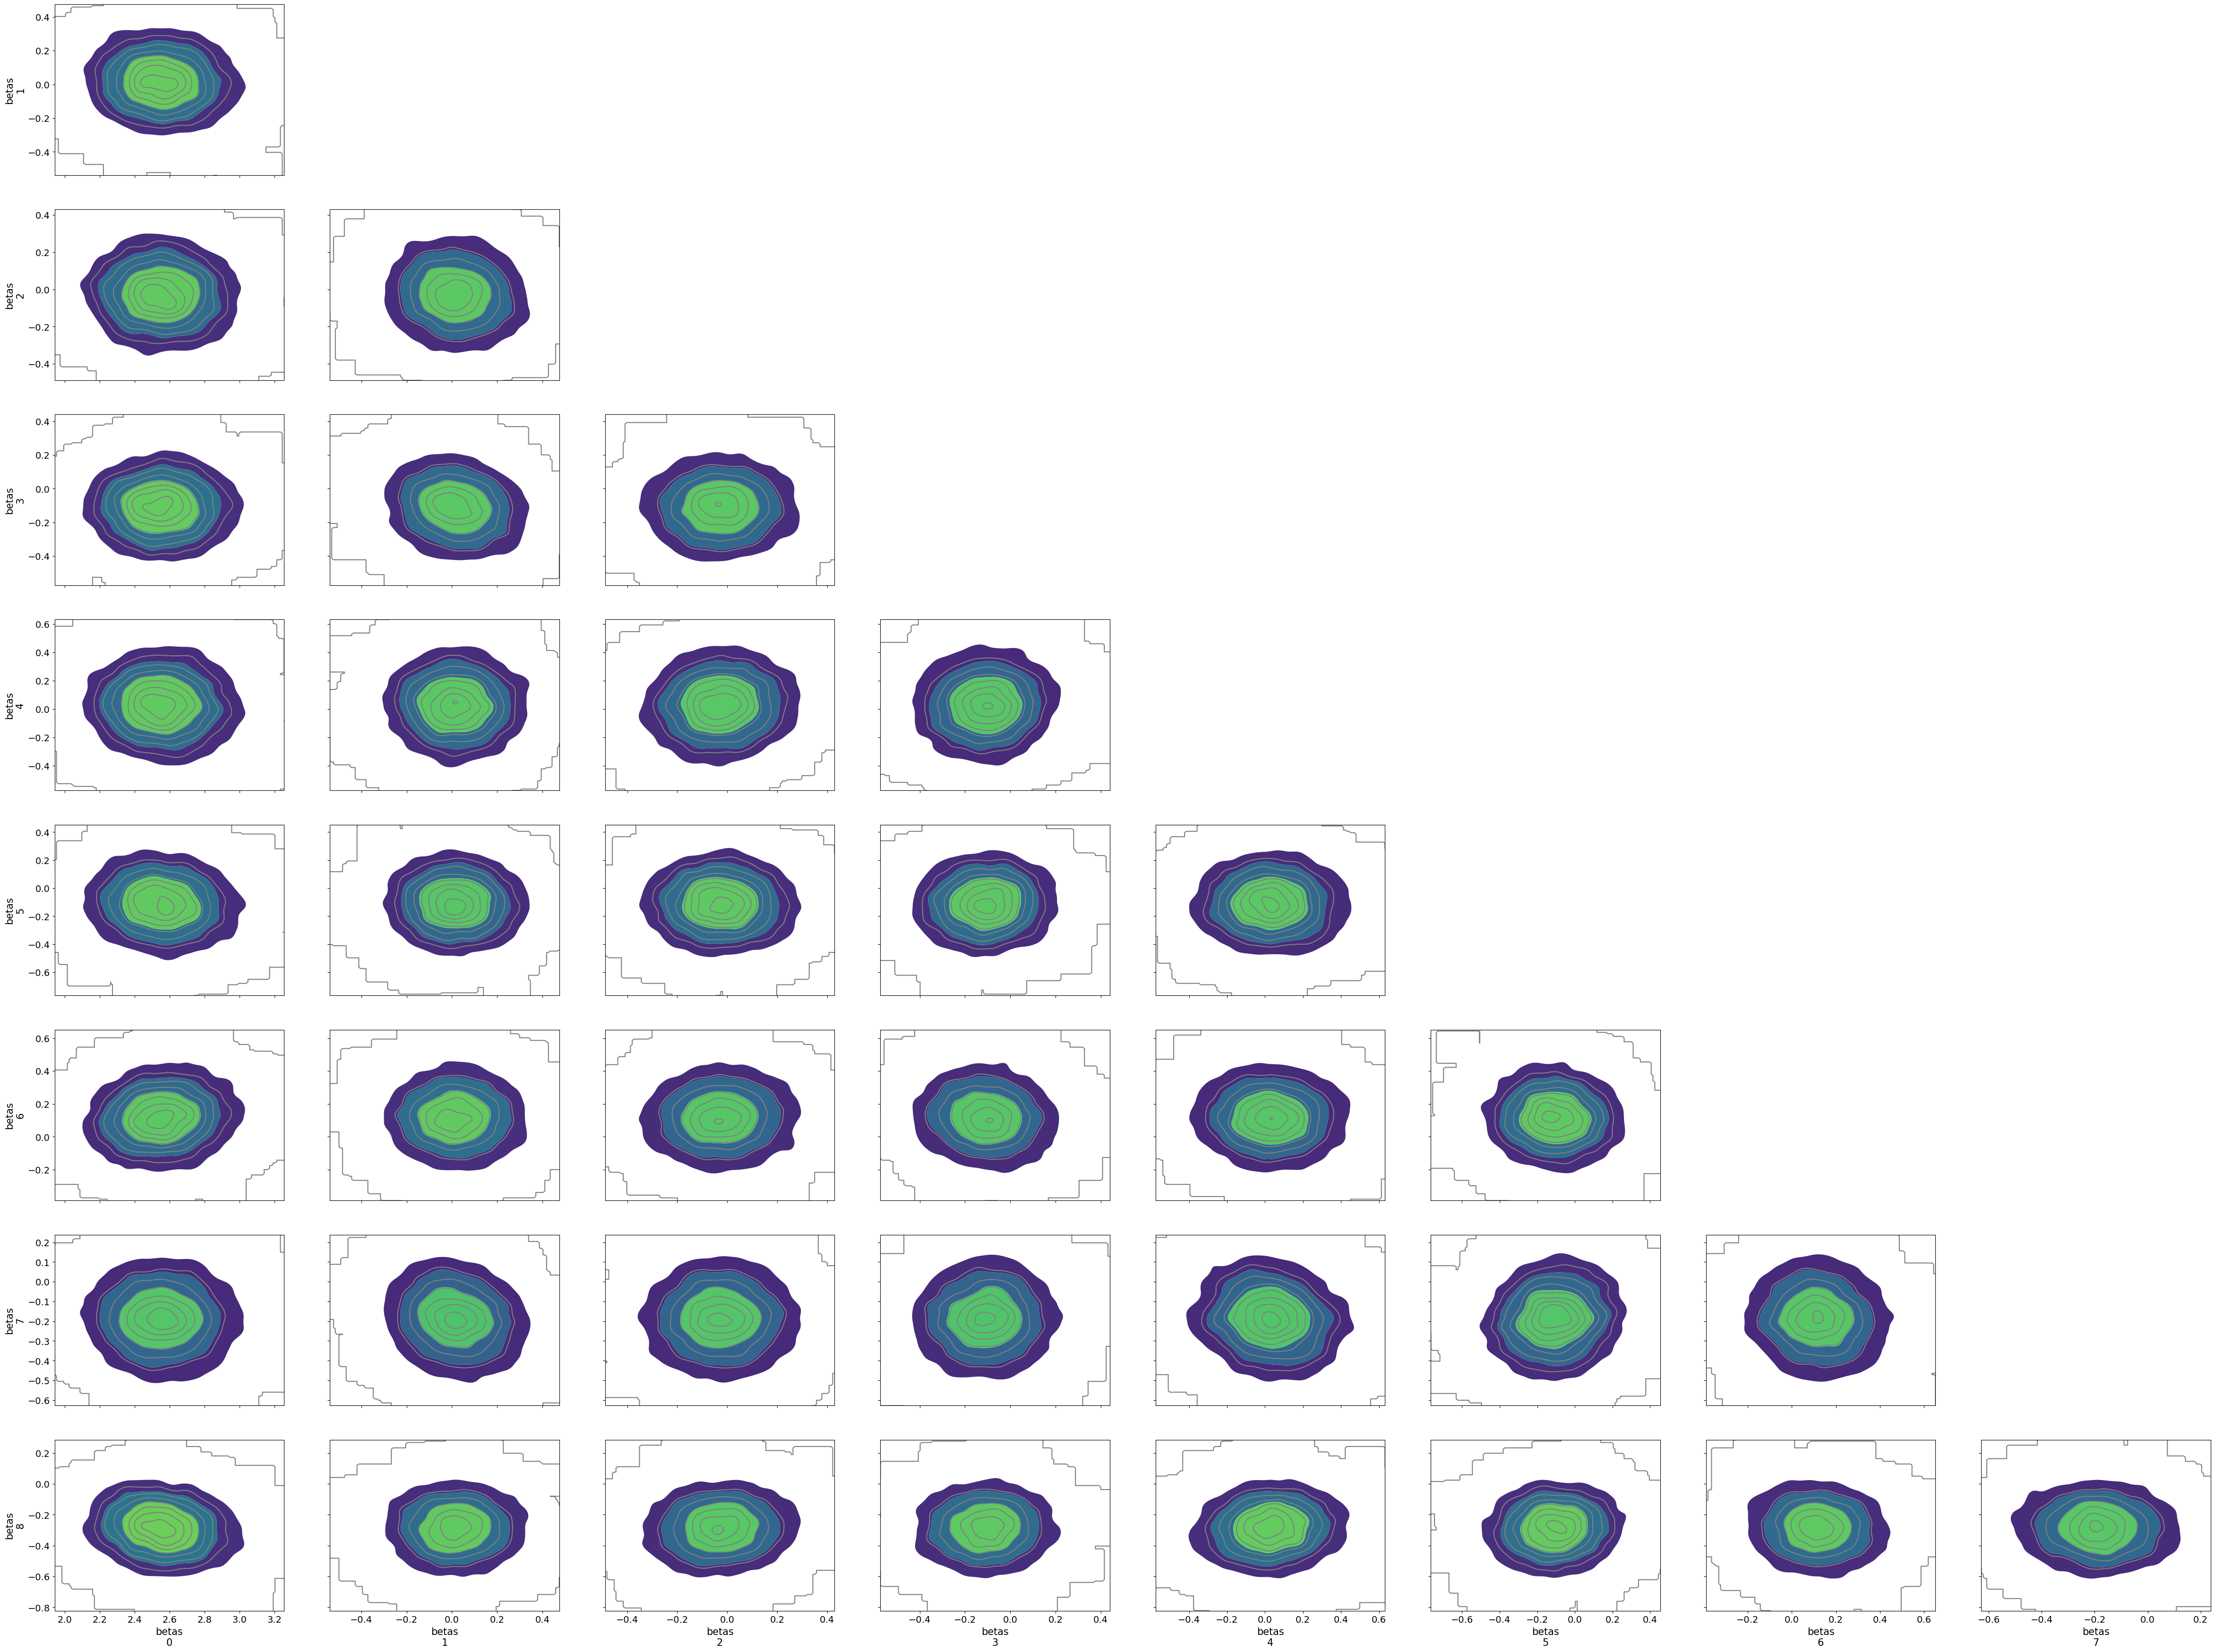

In [3]:
# Plot Posterior Distributions
az.plot_posterior(trace)
plt.show()

# Trace Plot
az.plot_trace(trace)
plt.show()

# Pair Plot for Correlations
az.plot_pair(trace, kind='kde', divergences=True)
plt.show()



Interpretation of Important Features on the Output (Price Range Prediction)

The Bayesian logistic regression model estimates how different features impact the probability of a mobile phone being in the higher price range (price_binary = 1). Here’s how some of the key features influence the outcome:

1. n_cores (Mean = 0.168, HDI [ -0.084, 0.426 ])
Effect: Phones with more processor cores are more likely to be in the higher price range.
2. int_memory (Mean = 0.094, HDI [ -0.163, 0.347 ])
Effect: Phones with more internal storage tend to be more expensive.
3. wifi (Mean = -0.151, HDI [ -0.400, 0.102 ])
Effect: Phones with WiFi capability have a slightly lower probability of being in a higher price range.
4. m_dep (Mobile Depth) (Mean = -0.168, HDI [ -0.430, 0.069 ])
Effect: Phones with thicker depth (bulkier phones) are slightly less likely to be in the high-price range.



In [4]:
df = pd.read_csv('Students_Grading_Dataset.csv')
continuous_cols = [
    "Attendance (%)", "Midterm_Score", "Assignments_Avg", "Quizzes_Avg",
    "Participation_Score", "Projects_Score", "Study_Hours_per_Week",
    "Stress_Level (1-10)", "Sleep_Hours_per_Night", "Final_Score", "Total_Score"
]

df_continuous = df[continuous_cols].dropna()

sample_sizes = [100, 500, 1000]

# Define number of predictor variables (p) for testing
p_values = [3, 5, 7]  # Selecting subsets of predictors

# Define number of output variables 
m = 2


exploration_results = []


for n in sample_sizes:
    for p in p_values:
        sampled_data = df_continuous.sample(n=n, random_state=42)
        predictor_cols = np.random.choice(sampled_data.columns[:-m], p, replace=False)
        
        response_cols = ["Final_Score", "Total_Score"]
        
        exploration_results.append({
            "Sample_Size (n)": n,
            "Predictor_Count (p)": p,
            "Predictors": list(predictor_cols),
            "Response_Variables": response_cols
        })


exploration_df = pd.DataFrame(exploration_results)
exploration_df

Sample_Size (n)  Predictor_Count (p)  \
0              100                    3   
1              100                    5   
2              100                    7   
3              500                    3   
4              500                    5   
5              500                    7   
6             1000                    3   
7             1000                    5   
8             1000                    7   

                                          Predictors  \
0  [Midterm_Score, Study_Hours_per_Week, Particip...   
1  [Midterm_Score, Assignments_Avg, Projects_Scor...   
2  [Stress_Level (1-10), Quizzes_Avg, Projects_Sc...   
3  [Projects_Score, Study_Hours_per_Week, Assignm...   
4  [Projects_Score, Assignments_Avg, Stress_Level...   
5  [Projects_Score, Participation_Score, Study_Ho...   
6  [Midterm_Score, Stress_Level (1-10), Quizzes_Avg]   
7  [Study_Hours_per_Week, Sleep_Hours_per_Night, ...   
8  [Stress_Level (1-10), Participation_Score, Att...   

           Response_Variables  
0  [Final_Score, Total_Score]  
1  [Final_Score, Total_Score]  
2  [Final_Score, Total_Score]  
3  [Final_Score, Total_Score]  
4  [Final_Score, Total_Score]  
5  [Final_Score, Total_Score]  
6  [Final_Score, Total_Score]  
7  [Final_Score, Total_Score]  
8  [Final_Score, Total_Score]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 220 seconds.
/opt/conda/lib/python3.11/site-packages/arviz/stats/density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


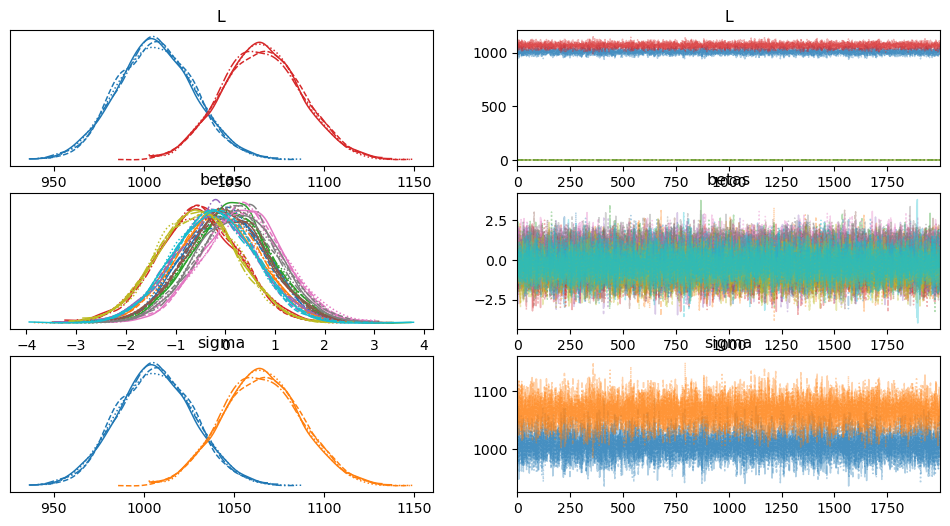

/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4


In [5]:
selected_n = 500
selected_p = 5


selected_sample = df_continuous.sample(n=selected_n, random_state=42)

# Define the selected predictors and response variables
selected_predictors = ["Midterm_Score", "Projects_Score", "Assignments_Avg", "Quizzes_Avg", "Attendance (%)"]
selected_responses = ["Final_Score", "Total_Score"]

# Convert to numpy arrays for modeling
X = selected_sample[selected_predictors].values  # (n, p) predictor matrix
Y = selected_sample[selected_responses].values   # (n, m) response matrix

X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_standardized = (X - X_mean) / X_std

# Define dimensions
n, p = X_standardized.shape  # Number of samples, predictors
m = Y.shape[1]               # Number of response variables


with pm.Model() as model:
    # Priors for regression coefficients
    betas = pm.Normal('betas', mu=0, sigma=1, shape=(p, m))

    # Independent standard deviation for each response variable
    sigma = pm.Exponential("sigma", 1.0, shape=m)

    # Define covariance matrix as a diagonal matrix 
    L = pm.Deterministic("L", pm.math.stack([sigma[i] if i == j else 0 for i in range(m) for j in range(m)]).reshape((m, m)))

    # Mean structure
    mu = pm.math.dot(X_standardized, betas)  # (n, m)

    # Likelihood
    y_obs = pm.MvNormal('y_obs', mu=mu, cov=L, observed=Y)

    # Sampling
    trace = pm.sample(2000, tune=1000, return_inferencedata=True, target_accept=0.9)

# MCMC diagnostics
az.plot_trace(trace)
plt.show()


    



In [7]:
az.summary(trace)

/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4


mean      sd    hdi_3%   hdi_97%  mcse_mean  mcse_sd  \
L[0, 0]      1006.499  21.231   968.379  1047.697      0.161    0.257   
L[0, 1]         0.000   0.000     0.000     0.000      0.000      NaN   
L[1, 0]         0.000   0.000     0.000     0.000      0.000      NaN   
L[1, 1]      1065.506  22.008  1025.854  1108.169      0.154    0.267   
betas[0, 0]    -0.013   0.822    -1.528     1.502      0.006    0.011   
betas[0, 1]    -0.152   0.842    -1.734     1.404      0.006    0.011   
betas[1, 0]     0.099   0.820    -1.449     1.623      0.006    0.010   
betas[1, 1]    -0.540   0.818    -2.055     1.006      0.006    0.010   
betas[2, 0]    -0.213   0.841    -1.772     1.416      0.006    0.011   
betas[2, 1]     0.025   0.832    -1.499     1.622      0.006    0.012   
betas[3, 0]     0.343   0.823    -1.250     1.869      0.006    0.011   
betas[3, 1]     0.240   0.821    -1.274     1.812      0.006    0.010   
betas[4, 0]    -0.553   0.810    -1.984     1.054      0.006    0.010   
betas[4, 1]    -0.232   0.819    -1.779     1.284      0.006    0.012   
sigma[0]     1006.499  21.231   968.379  1047.697      0.161    0.257   
sigma[1]     1065.506  22.008  1025.854  1108.169      0.154    0.267   

             ess_bulk  ess_tail  r_hat  
L[0, 0]       17475.0    5890.0    1.0  
L[0, 1]        8000.0    8000.0    NaN  
L[1, 0]        8000.0    8000.0    NaN  
L[1, 1]       20316.0    6278.0    1.0  
betas[0, 0]   18229.0    5617.0    1.0  
betas[0, 1]   20420.0    5444.0    1.0  
betas[1, 0]   19080.0    6515.0    1.0  
betas[1, 1]   18380.0    5979.0    1.0  
betas[2, 0]   17658.0    5725.0    1.0  
betas[2, 1]   18797.0    5551.0    1.0  
betas[3, 0]   19842.0    5526.0    1.0  
betas[3, 1]   17207.0    6070.0    1.0  
betas[4, 0]   16268.0    5395.0    1.0  
betas[4, 1]   16973.0    5882.0    1.0  
sigma[0]      17475.0    5890.0    1.0  
sigma[1]      20316.0    6278.0    1.0

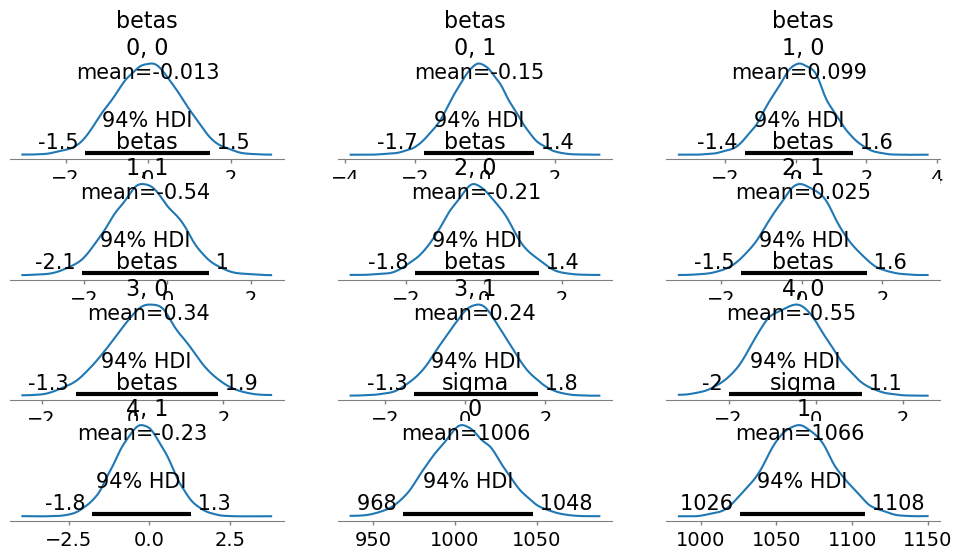

In [11]:
selected_vars = ["betas", "sigma"] 

az.plot_posterior(trace, var_names=selected_vars, figsize=(12, 6))
plt.show()

betas[0,1] = 0.099 (Weak Positive Effect on Total Score)
The first predictor (Midterm Score) has a small positive effect on Total Score.

betas[3,0] = 0.343 (Positive Effect on Final Score)
The fourth predictor (Quizzes Avg) has a small positive effect on Final Score.
A one-unit increase in this predictor leads to a 0.34 point increase in Final Score.

However, The model suggests some relationships but with uncertainty:
The HDI ranges include zero for most coefficients, meaning we cannot be highly confident about these effects.
Some predictors might not be strong indicators of student performance:
Projects Score, Quizzes Avg, and Attendance show some effects but are not definitive predictors.


In [13]:
df = pd.read_csv('accident.csv')


df = df.dropna()  


df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Helmet_Used'] = df['Helmet_Used'].map({'No': 0, 'Yes': 1})
df['Seatbelt_Used'] = df['Seatbelt_Used'].map({'No': 0, 'Yes': 1})


features = ['Age', 'Gender', 'Speed_of_Impact']
outcomes = ['Survived', 'Seatbelt_Used']


df_sampled = df.sample(n=100, random_state=42)


X = df_sampled[features].values  # (n, p)
Y = df_sampled[outcomes].values  # (n, m)


X.shape, Y.shape, df_sampled.head()

((100, 3),
 (100, 2),
      Age  Gender  Speed_of_Impact  Helmet_Used  Seatbelt_Used  Survived
 143   20       1            108.0            0              1         0
 117   22       0            118.0            1              0         0
 17    39       0             68.0            0              0         0
 79    53       0             35.0            1              0         0
 158   56       0             76.0            0              1         0)

In [19]:
df_sampled_small = df.sample(n=50, random_state=42)
X_small = df_sampled_small[features].values  # (n, p)
Y_small = df_sampled_small[outcomes].values  # (n, m)

# Bayesian Model with further optimization
with pm.Model() as optimized_small_model:
    # Prior for beta coefficients
    betas = pm.Normal("betas", mu=0, sigma=1, shape=(3, 2))

    # Latent variable z with independent normal priors instead of MvNormal
    z = pm.Normal("z", mu=X_small @ betas, sigma=1, shape=(50, 2))

    # Likelihood (Observed binary outcomes)
    y = pm.Bernoulli("y", p=pm.math.invprobit(z), observed=Y_small)

    step = pm.Metropolis()
    trace_optimized_small = pm.sample(1000, tune=500, step=step, return_inferencedata=True, cores=2, random_seed=42)

summary_optimized_small = az.summary(trace_optimized_small)
summary_optimized_small

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [betas]
>Metropolis: [z]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 5 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0, 0]  0.018  0.008   0.006    0.036      0.002    0.001      17.0   
betas[0, 1] -0.009  0.009  -0.026    0.004      0.004    0.001       4.0   
betas[1, 0] -0.455  0.528  -1.314    0.630      0.092    0.038      34.0   
betas[1, 1]  0.183  0.422  -0.572    0.950      0.078    0.027      30.0   
betas[2, 0] -0.010  0.005  -0.019   -0.003      0.001    0.001      22.0   
...            ...    ...     ...      ...        ...      ...       ...   
z[47, 1]    -0.710  0.865  -2.442    0.789      0.067    0.033     162.0   
z[48, 0]     0.778  0.895  -0.815    2.452      0.053    0.026     293.0   
z[48, 1]    -0.799  0.948  -2.684    0.868      0.062    0.033     235.0   
z[49, 0]     0.654  0.916  -0.922    2.506      0.064    0.032     209.0   
z[49, 1]     0.395  0.847  -1.163    1.874      0.060    0.025     202.0   

             ess_tail  r_hat  
betas[0, 0]      40.0   1.16  
betas[0, 1]      43.0   1.51  
betas[1, 0]      95.0   1.05  
betas[1, 1]      77.0   1.06  
betas[2, 0]      43.0   1.06  
...               ...    ...  
z[47, 1]        352.0   1.02  
z[48, 0]        593.0   1.01  
z[48, 1]        347.0   1.03  
z[49, 0]        343.0   1.02  
z[49, 1]        460.0   1.01  

[106 rows x 9 columns]

/opt/conda/lib/python3.11/site-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (106) in plot_posterior, generating only 40 plots
  warnings.warn(


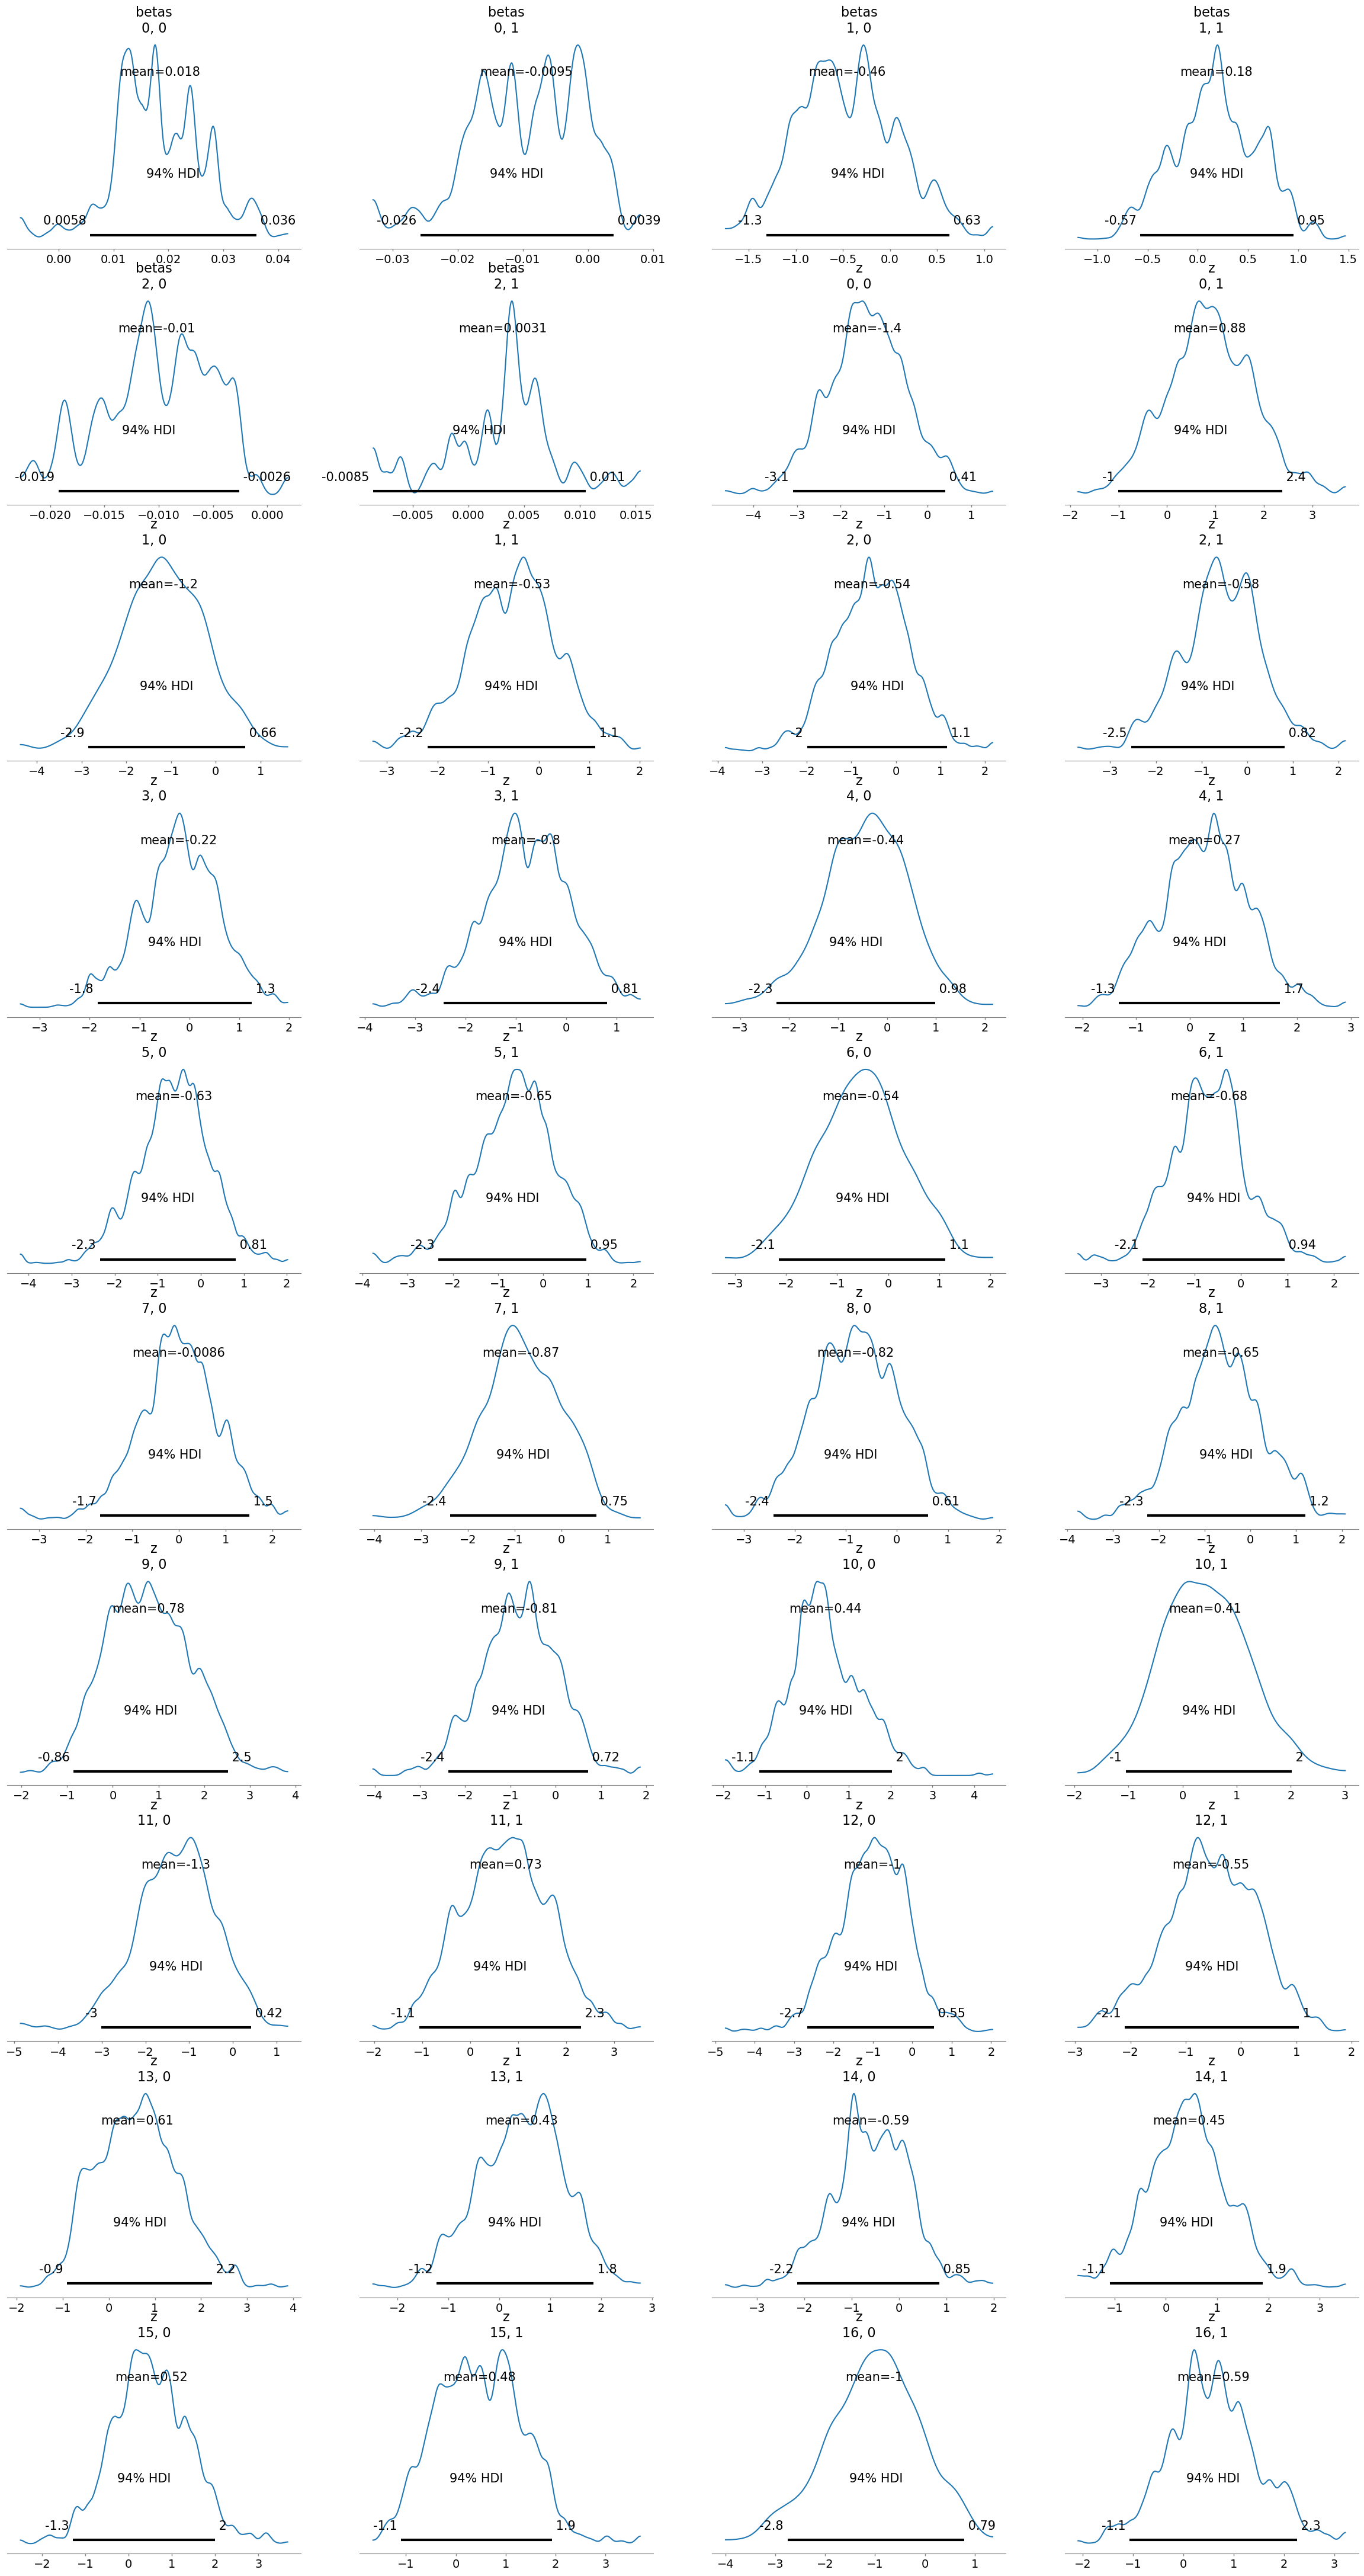

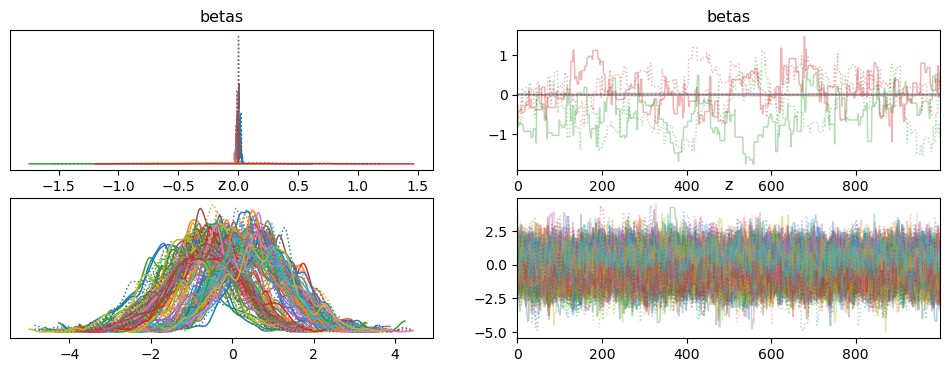

In [23]:
selected_vars = ["betas", "sigma"] 

az.plot_posterior(trace_optimized_small)
plt.show()

az.plot_trace(trace_optimized_small)
plt.show()